# Device_Problems Categories Reduction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import string
import io
import re

# ICU Ventialor data for 2020 from MAUDE database 

In [29]:
pd.options.display.max_colwidth=500
data = pd.read_csv ('CBKmdr2020.csv')
df = pd.DataFrame(data)

# Only 3 columns, we'll need from 17 columns

In [30]:
col = ['Device_Problems', 'Event_description','Narrative']
df = df[col]

# DataFrame with 3 columns and 11083 row

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Device_Problems    11079 non-null  object
 1   Event_description  11076 non-null  object
 2   Narrative          6923 non-null   object
dtypes: object(3)
memory usage: 259.9+ KB


# Dataframe columns for our problem

In [32]:
df.head()

,Device_Problems,Event_description,Narrative
0,Inappropriate or Unexpected Reset (2959),The hospital reported that the unit would restart on its own. There was no report of patient involvement.,The switching board and power supply board were replaced to resolve the reported issue. No report of patient involvement. Date of device manufacture was unavailable at time of mdr filing.
1,Failure to Calibrate (2440),It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmed's risk analysis for this failure mode concludes that the risk is acceptable. Resmed reference #: (b)(4).
2,Failure to Calibrate (2440),It was reported to resmed that an astral device failed to complete its internal self-test. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to resmed and an evaluation confirmed the complaint. The non-return valve (nrv) assembly was replaced to address this issue. The device was serviced and fully tested before it was returned to the customer. Resmed's risk analysis for this failure mode concludes that the risk is acceptable. (b)(4).
3,Failure to Charge (1085),It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmed's risk analysis for these failure modes concludes that the risk is acceptable. (b)(4).
4,Failure to Charge (1085),It was reported to resmed that an astral device failed to charge. There was no patient harm or serious injury reported as a result of this incident.,The device was returned to an authorized resmed third party service center for an evaluation and service. The customer was issued with a replacement main circuit board as part of a warranty claim. Resmed's risk analysis for these failure modes concludes that the risk is acceptable. Resmed reference #: (b)(4).


# Pre-processing on data

# 1- Remove Parenthesis (1085) in [Failure to Charge (1085)] device_problem

# 2- Convert capital characters to lower case

# 3- Remove white space at both ends and punctuations

In [37]:
re_Parenthesis_list =["Device_Problems"]
re_Apostrophe_list =["Event_description","Narrative"]
strip_list =["Device_Problems"]
# regex to remove punctuations and parenthesis 
for i in range(0, len(re_Parenthesis_list)):
    df[re_Parenthesis_list[i]] = df[re_Parenthesis_list[i]].replace({'\([^()]*\)':''}, regex=True) #to remove parenthesis
    df[re_Parenthesis_list[i]] = df[re_Parenthesis_list[i]].str.lower()                            #to convert to lower case
# regex to remove the punctuations
for i in range(0, len(re_Apostrophe_list)):
    #df[re_Apostrophe_list[i]] = df[re_Apostrophe_list[i]].replace({'(?<=[a-z])\'(?=[a-z])':''}, regex=True) #to remove Apostrohe
    df[re_Apostrophe_list[i]] = df[re_Apostrophe_list[i]].str.lower()                              #to convert to lower case
    df[re_Apostrophe_list[i]] = df[re_Apostrophe_list[i]].str.replace('[^\w\s]','')                #to remove punctuations
#To remove white space at both ends
for i in range(0, len(strip_list)):
    df[strip_list[i]]= df[strip_list[i]].str.strip()

# Device_Problem Categories after pre-processing

In [38]:
print('Num_D_problems:',len(pd.DataFrame(df.Device_Problems.value_counts())))
pd.DataFrame(df.Device_Problems.value_counts())

Num_D_problems: 745


,Device_Problems
mechanical problem,2036
output problem,738
circuit failure,698
failure to recalibrate,605
failure of device to self-test,429
...,...
"circuit failure ; failure to recalibrate ; incorrect, inadequate or imprecise resultor readings",1
failure to deliver ; no pressure ; no apparent adverse event,1
output problem ; power problem,1
defective component ; component missing,1


# Data rows after pre-processing

In [39]:
df.head()

,Device_Problems,Event_description,Narrative
0,inappropriate or unexpected reset,the hospital reported that the unit would restart on its own there was no report of patient involvement,the switching board and power supply board were replaced to resolve the reported issue no report of patient involvement date of device manufacture was unavailable at time of mdr filing
1,failure to calibrate,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incident,the device was returned to resmed and an evaluation confirmed the complaint the nonreturn valve nrv assembly was replaced to address this issue the device was serviced and fully tested before it was returned to the customer resmeds risk analysis for this failure mode concludes that the risk is acceptable resmed reference b4
2,failure to calibrate,it was reported to resmed that an astral device failed to complete its internal selftest there was no patient harm or serious injury reported as a result of this incident,the device was returned to resmed and an evaluation confirmed the complaint the nonreturn valve nrv assembly was replaced to address this issue the device was serviced and fully tested before it was returned to the customer resmeds risk analysis for this failure mode concludes that the risk is acceptable b4
3,failure to charge,it was reported to resmed that an astral device failed to charge there was no patient harm or serious injury reported as a result of this incident,the device was returned to an authorized resmed third party service center for an evaluation and service the customer was issued with a replacement main circuit board as part of a warranty claim resmeds risk analysis for these failure modes concludes that the risk is acceptable b4
4,failure to charge,it was reported to resmed that an astral device failed to charge there was no patient harm or serious injury reported as a result of this incident,the device was returned to an authorized resmed third party service center for an evaluation and service the customer was issued with a replacement main circuit board as part of a warranty claim resmeds risk analysis for these failure modes concludes that the risk is acceptable resmed reference b4


#  Lists of Device_problems subcategories to convert them into 5 main Categories

In [40]:
Calibration_Problems=['failure of device to self-test','Failure to calibrate','Calibration Problem',
                      'failure to calibrate ; battery problem',
                      'Protective Measures Problem','failure to recalibrate',
                      'Failure to device to self-test','Failure to Read Input Signal','Volume Accuracy Problem',
                     'Failure to Align']


Software_Problems=['computer software','device displays incorrect message ; unexpected shutdown',
                   'computer software problem',
                   'Inadequate user interface','computer operating system problem',
                  'Application Program Problem']


Power_Problems=['battery problem','failure to charge','battery problem ; protective measures problem ; unexpected shutdown',
                'overheating of device ; battery problem','failure to power up',
                'ailure to power up','premature discharge of battery','Loss of Power',
                'Complete Loss Of Power','Failure to Run on Battery','Aborted Charge','power problem','charging problem']

                

Mechanical_Problems=['Mechanical Problem','contamination ; mechanical problem','Detachment Of Device Or Device Component',
                     'contamination ; mechanical problem',
                     'Mechanical Problem','Mechanics Altered','Material Erosion',
                     'mechanical problem ; failure to recalibrate',
                     'gas output problem ; decreased pump speed ; failure to deliver ; no pressure',
                     'mechanical problem ; failure of device to self-test',
                     'Device Fell','Material Rupture','Inaccurate Delivery','Failure to Deliver','No flow',
                     'Unintended Collision','Physical Resistance/Sticking','Obstruction of Flow','Failure to Cycle',
                     'Insufficient Flow or Under Infusion']

In [42]:
Circuit_failure=['output problem','communication or transmission problem','No display image','no display/image','Erratic or intermittent display','Poor Quality Image','Defective component','circuit failure','device displays incorrect message',
                 'failure to charge ; circuit failure ; battery problem','no audible alarm''failure to charge ; failure to recalibrate ; battery problem','erratic or intermittent display ; device displays incorrect message',
                 'thermal decomposition of device ; failure to power up ; battery problem','no flow ; output problem','display or visual feedback problem ; improper flow or infusion','incorrect, inadequate or imprecise resultor readings','use of device problem',
                 'therapeutic or diagnostic output failure','no audible alarm',  'output problem','Incorrect, in adequate or imprecise resultor Reading','Device displays incorrect massage',
                'Image Display Error/Artifact','Defective device','Unable to Obtain Readings','Display or Visual Feedback Problem','Disconnection','Data Problem','Break',
                 'erratic or intermittent display ; no flow','Noise, Audible','Unexpected Shutdown','Device Alarm System','Protective Measures Problem',
                 'Low Readings','Electro-Static Discharge','Component Missing','Electrical Shorting','Tidal Volume Fluctuations','Smoking','Improper Flow or Infusion','No Tactile Prompts/Feedback',
                 'Connection Problem','Leak/Splash','Display Difficult to Read','High Readings','Inappropriate or Unexpected Reset','Appropriate Term/Code Not Available','Contamination',
                 'Insufficient Information','Infusion or Flow Problem','Temperature Problem','Activation Problem',
                 'Tactile Prompts/Feedback','Image Display Error/Artifact','Environmental Compatibility Problem']

In [44]:
red_DP_list=[Calibration_Problems,Software_Problems,Circuit_failure,Power_Problems,Mechanical_Problems]
red_DP_list_lower=[Calibration_Problems,Software_Problems,Circuit_failure,Power_Problems,Mechanical_Problems]
for i in range(0, len(red_DP_list)):
    #df[strip_list[i]]= df[strip_list[i]].str.strip()
    series=pd.Series(red_DP_list[i]).str.strip()
    red_DP_list_lower[i] = list(series.str.lower()) 
    #red_DP_list_lower[i].str.strip()
print(red_DP_list_lower)

[['failure of device to self-test', 'failure to calibrate', 'calibration problem', 'failure to calibrate ; battery problem', 'protective measures problem', 'failure to recalibrate', 'failure to device to self-test', 'failure to read input signal', 'volume accuracy problem', 'failure to align'], ['computer software', 'device displays incorrect message ; unexpected shutdown', 'computer software problem', 'inadequate user interface', 'computer operating system problem', 'application program problem'], ['output problem', 'communication or transmission problem', 'no display image', 'no display/image', 'erratic or intermittent display', 'poor quality image', 'defective component', 'circuit failure', 'device displays incorrect message', 'failure to charge ; circuit failure ; battery problem', 'no audible alarmfailure to charge ; failure to recalibrate ; battery problem', 'erratic or intermittent display ; device displays incorrect message', 'thermal decomposition of device ; failure to power 

# Replace Subcategories into 5 main categories

In [49]:
df['Device_Problems']= df['Device_Problems'].str.strip()
Names_red_DP_list=['Calibration_Problems','Software_Problems','Circuit_failure','Power_Problems','Mechanical_Problems']
for i in range(0, len(red_DP_list_lower)):
    df.Device_Problems= df.Device_Problems.replace(red_DP_list_lower[i],Names_red_DP_list[i])

In [52]:
Calibration_df=df.where(df['Device_Problems'] == 'Calibration_Problems').dropna()
Software_df=df.where(df['Device_Problems'] == 'Software_Problems').dropna()
Circuit_df=df.where(df['Device_Problems'] == 'Circuit_failure').dropna()
Power_df=df.where(df['Device_Problems'] == 'Power_Problems').dropna()
Mechanical_df=df.where(df['Device_Problems'] == 'Mechanical_Problems').dropna()
frames = [Mechanical_df,Circuit_df,Calibration_df,Power_df,Software_df]
dataframes_names=  ['Mechanical_df','Circuit_df','Calibration_df','Power_df','Software_df']
for i in range(0, len(frames)):
    print(dataframes_names[i],'length =',len(frames[i]))

Mechanical_df length = 1937
Circuit_df length = 1566
Calibration_df length = 1186
Power_df length = 612
Software_df length = 82


# Concatenate them in one dataframe 

In [53]:
result = pd.concat(frames, ignore_index=True,sort=False)
#print(pd.DataFrame(result))
print(len(result))

5383


In [54]:
pd.DataFrame(result).head()

,Device_Problems,Event_description,Narrative
0,Mechanical_Problems,it was reported to vyaire that the avea ventilator would not pressurize failed the circuit calibration and was alarming low pressure the customer advised there was no patient involvement associated with this event,b4 a vyaire field service representative fsr evaluated the device onsite and could not duplicate the problems reported by the customer the fsr performed the est and performance check he confirmed the ventilator passed all testing and met all vyaire oem specifications vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available
1,Mechanical_Problems,the customer reported that the ventilator turns on into ventilation mode successfully but will not go into diagnostic mode there was no patient involvement technical support advised the customer that it is possibly due to a defective central processing unit printed board assembly cpu pcba,date of event b6 2019 date of report 02jan2020
2,Mechanical_Problems,it was reported to vyaire that the fio2 on the avea ventilator does not change when the setting is changed to another value the customer advised there was no patient involvement associated with this event,b4 the vyaire failure analysis laboratory received the suspect component and performed a failure investigation the reported issue was duplicated and was isolated to the o2 blender this issue was addressed by capa b4 vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available
3,Mechanical_Problems,it was reported to vyaire that the vela ventilator was alarming transducer fault and vent inop the customer advised there was no patient involvement associated with this event,b4 at this time vyaire has not received the suspect devicecomponent for evaluation vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available
4,Mechanical_Problems,it was reported to vyaire that the compressor on the avea ventilator was not working the customer advised the patient was moved to another ventilator,vyaire complaint b4 at this time vyaire has not received the suspect devicecomponent for evaluation vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available


In [55]:
result.Device_Problems.value_counts()

Mechanical_Problems     1937
Circuit_failure         1566
Calibration_Problems    1186
Power_Problems           612
Software_Problems         82
Name: Device_Problems, dtype: int64

In [56]:
len(result)

5383

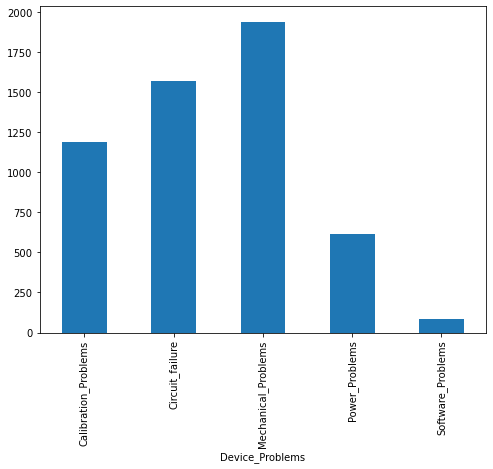

In [21]:
fig = plt.figure(figsize=(8,6))
result.groupby('Device_Problems').Event_description.count().plot.bar(ylim=0)
plt.show()

# Combine Narrative and Event description columns in one column

In [57]:
result["Event_description_Narrative"] = result["Event_description"] + result["Narrative"]
print(len(pd.DataFrame(result)))
result.head()

5383


,Device_Problems,Event_description,Narrative,Event_description_Narrative
0,Mechanical_Problems,it was reported to vyaire that the avea ventilator would not pressurize failed the circuit calibration and was alarming low pressure the customer advised there was no patient involvement associated with this event,b4 a vyaire field service representative fsr evaluated the device onsite and could not duplicate the problems reported by the customer the fsr performed the est and performance check he confirmed the ventilator passed all testing and met all vyaire oem specifications vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available,it was reported to vyaire that the avea ventilator would not pressurize failed the circuit calibration and was alarming low pressure the customer advised there was no patient involvement associated with this eventb4 a vyaire field service representative fsr evaluated the device onsite and could not duplicate the problems reported by the customer the fsr performed the est and performance check he confirmed the ventilator passed all testing and met all vyaire oem specifications vyaire medical ...
1,Mechanical_Problems,the customer reported that the ventilator turns on into ventilation mode successfully but will not go into diagnostic mode there was no patient involvement technical support advised the customer that it is possibly due to a defective central processing unit printed board assembly cpu pcba,date of event b6 2019 date of report 02jan2020,the customer reported that the ventilator turns on into ventilation mode successfully but will not go into diagnostic mode there was no patient involvement technical support advised the customer that it is possibly due to a defective central processing unit printed board assembly cpu pcbadate of event b6 2019 date of report 02jan2020
2,Mechanical_Problems,it was reported to vyaire that the fio2 on the avea ventilator does not change when the setting is changed to another value the customer advised there was no patient involvement associated with this event,b4 the vyaire failure analysis laboratory received the suspect component and performed a failure investigation the reported issue was duplicated and was isolated to the o2 blender this issue was addressed by capa b4 vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available,it was reported to vyaire that the fio2 on the avea ventilator does not change when the setting is changed to another value the customer advised there was no patient involvement associated with this eventb4 the vyaire failure analysis laboratory received the suspect component and performed a failure investigation the reported issue was duplicated and was isolated to the o2 blender this issue was addressed by capa b4 vyaire medical will submit a supplemental report in accordance with 21 cfr s...
3,Mechanical_Problems,it was reported to vyaire that the vela ventilator was alarming transducer fault and vent inop the customer advised there was no patient involvement associated with this event,b4 at this time vyaire has not received the suspect devicecomponent for evaluation vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available,it was reported to vyaire that the vela ventilator was alarming transducer fault and vent inop the customer advised there was no patient involvement associated with this eventb4 at this time vyaire has not received the suspect devicecomponent for evaluation vyaire medical will submit a supplemental report in accordance with 21 cfr section 803 56 if additional information becomes available
4,Mechanical_Problems,it was reported to vyaire that the compressor on the avea ventilator was not working the customer advised the patient was moved to another ventilator,vyaire complaint b4 at this time vyair

# Save the Dataframe after data transformation 

In [58]:
result.to_csv('CBK2020transformed.csv')